In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [32]:
path = '../../data/07-05-2021.csv'

In [33]:
df = pd.read_csv(path)

In [34]:
df.head(10)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-07-06 04:21:32,33.93911,67.709953,125937,5283,75314.0,45340.0,Afghanistan,323.509805,4.194955
1,NaN,NaN,NaN,Albania,2021-07-06 04:21:32,41.15330,20.168300,132537,2456,130029.0,52.0,Albania,4605.497255,1.853067
2,NaN,NaN,NaN,Algeria,2021-07-06 04:21:32,28.03390,1.659600,141966,3765,98748.0,39453.0,Algeria,323.746005,2.652043
3,NaN,NaN,NaN,Andorra,2021-07-06 04:21:32,42.50630,1.521800,13918,127,13721.0,70.0,Andorra,18013.330745,0.912487
4,NaN,NaN,NaN,Angola,2021-07-06 04:21:32,-11.20270,17.873900,39300,915,33739.0,4646.0,Angola,119.575487,2.328244
5,NaN,NaN,NaN,Antigua and Barbuda,2021-07-06 04:21:32,17.06080,-61.796400,1264,42,1222.0,0.0,Antigua and Barbuda,1290.744220,3.322785
6,NaN,NaN,NaN,Argentina,2021-07-06 04:21:32,-38.41610,-63.616700,4552750,96521,4175856.0,280373.0,Argentina,10073.396902,2.120059
7,NaN,NaN,NaN,Armenia,2021-07-06 04:21:32,40.06910,45.038200,225606,4527,217198.0,3881.0,Armenia,7613.506055,2.006596
8,NaN,NaN,Australian Capital Territory,Australia,2021-07-06 04:21:32,-35.47350,149.012400,124,3,121.0,0.0,"Australian Capital Territory, Australia",28.965195,2.419355
9,NaN,NaN,New South Wales,Australia,2021-07-06 04:21:32,-33.86880,151.209300,5997,54,0.0,5943.0,"New South Wales, Australia",73.872875,0.900450


In [35]:
df.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [36]:
df.drop(['FIPS', 'Admin2', 'Last_Update', 'Lat', 'Long_', 'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'], axis=1, inplace=True)

In [37]:
df.head()

,Province_State,Country_Region,Confirmed,Deaths,Recovered,Active
0,NaN,Afghanistan,125937,5283,75314.0,45340.0
1,NaN,Albania,132537,2456,130029.0,52.0
2,NaN,Algeria,141966,3765,98748.0,39453.0
3,NaN,Andorra,13918,127,13721.0,70.0
4,NaN,Angola,39300,915,33739.0,4646.0


In [38]:
df.isnull().sum()

Province_State     173
Country_Region       0
Confirmed            0
Deaths               0
Recovered         3277
Active            3279
dtype: int64

In [39]:
df_us = df[df['Country_Region'] == 'US']

In [40]:
df_us.head(10)

,Province_State,Country_Region,Confirmed,Deaths,Recovered,Active
655,Alabama,US,7262,113,NaN,NaN
656,Alabama,US,22043,315,NaN,NaN
657,Alabama,US,2347,60,NaN,NaN
658,Alabama,US,2693,64,NaN,NaN
659,Alabama,US,6988,139,NaN,NaN
660,Alabama,US,1250,42,NaN,NaN
661,Alabama,US,2264,71,NaN,NaN
662,Alabama,US,14778,330,NaN,NaN
663,Alabama,US,3738,123,NaN,NaN
664,Alabama,US,1874,45,NaN,NaN


In [41]:
df_us.drop(['Recovered', 'Active'], axis=1, inplace=True)

/home/roblivesinottawa/.local/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [42]:
df_us.head(10)

,Province_State,Country_Region,Confirmed,Deaths
655,Alabama,US,7262,113
656,Alabama,US,22043,315
657,Alabama,US,2347,60
658,Alabama,US,2693,64
659,Alabama,US,6988,139
660,Alabama,US,1250,42
661,Alabama,US,2264,71
662,Alabama,US,14778,330
663,Alabama,US,3738,123
664,Alabama,US,1874,45


In [43]:
df_us.rename(columns={'Province_State': 'State', 'Country_Region': 'Country'}, inplace=True)

/home/roblivesinottawa/.local/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [44]:
df_us.head()

,State,Country,Confirmed,Deaths
655,Alabama,US,7262,113
656,Alabama,US,22043,315
657,Alabama,US,2347,60
658,Alabama,US,2693,64
659,Alabama,US,6988,139


In [45]:
df_us[df_us['State'] == 'California']['Deaths']

848     1253
849        0
850       47
851      201
852       55
853       16
854      820
855        8
856      113
857     1727
858       20
859       49
860      739
861       36
862     1408
863      245
864       63
865       26
866    24506
867      241
868      233
869        7
870       49
871      470
872        4
873        3
874      494
875       81
876       72
877     5126
878      302
879        4
880     4539
881     1679
882       63
883     5037
884     3780
885      558
886     1410
887      257
888      541
889      460
890     2095
891      208
892      205
893        0
894       29
895      268
896      316
897     1029
898      114
899       63
900        3
901      853
902       64
903        0
904     1033
905      213
906       51
Name: Deaths, dtype: int64

<AxesSubplot:>

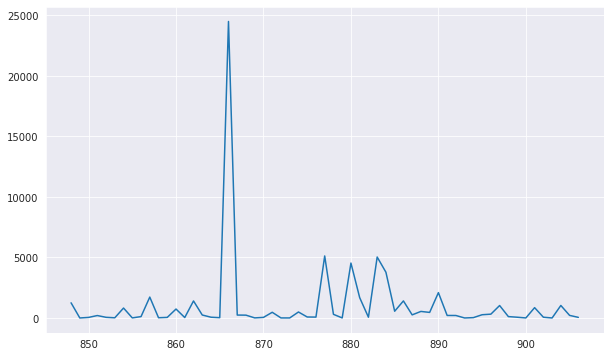

In [46]:
df_us[df_us['State'] == 'California']['Deaths'].plot(kind='line', figsize=(10, 6))

In [47]:
# check the top 5 states with the most deaths
df_us.groupby('State')['Deaths'].sum().sort_values(ascending=False).head(5)

State
California      63286
New York        53496
Texas           52482
Florida         37985
Pennsylvania    27706
Name: Deaths, dtype: int64

In [48]:
df_us.head()

,State,Country,Confirmed,Deaths
655,Alabama,US,7262,113
656,Alabama,US,22043,315
657,Alabama,US,2347,60
658,Alabama,US,2693,64
659,Alabama,US,6988,139


In [49]:
df_us.groupby('State')['Deaths'].sum().sort_values(ascending=False).head(5)

State
California      63286
New York        53496
Texas           52482
Florida         37985
Pennsylvania    27706
Name: Deaths, dtype: int64

<AxesSubplot:xlabel='State'>

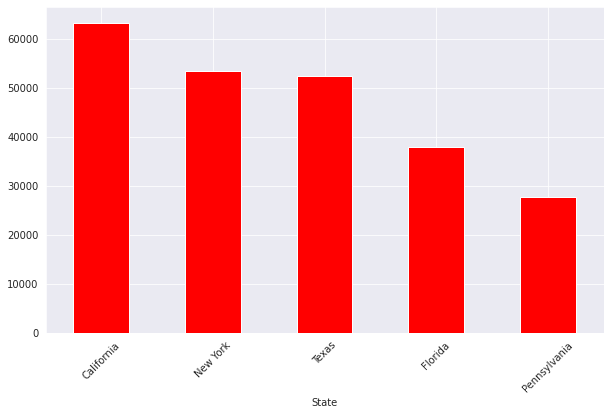

In [50]:
df_us.groupby('State')['Deaths'].sum().sort_values(ascending=False).head(5).plot(kind='bar', figsize=(10, 6), rot=45, color='red')

In [51]:
df.head(10)

,Province_State,Country_Region,Confirmed,Deaths,Recovered,Active
0,NaN,Afghanistan,125937,5283,75314.0,45340.0
1,NaN,Albania,132537,2456,130029.0,52.0
2,NaN,Algeria,141966,3765,98748.0,39453.0
3,NaN,Andorra,13918,127,13721.0,70.0
4,NaN,Angola,39300,915,33739.0,4646.0
5,NaN,Antigua and Barbuda,1264,42,1222.0,0.0
6,NaN,Argentina,4552750,96521,4175856.0,280373.0
7,NaN,Armenia,225606,4527,217198.0,3881.0
8,Australian Capital Territory,Australia,124,3,121.0,0.0
9,New South Wales,Australia,5997,54,0.0,5943.0


In [52]:
df.rename(columns={'Province_State': 'State', 'Country_Region': 'Country'}, inplace=True)

In [53]:
df.head(10)

,State,Country,Confirmed,Deaths,Recovered,Active
0,NaN,Afghanistan,125937,5283,75314.0,45340.0
1,NaN,Albania,132537,2456,130029.0,52.0
2,NaN,Algeria,141966,3765,98748.0,39453.0
3,NaN,Andorra,13918,127,13721.0,70.0
4,NaN,Angola,39300,915,33739.0,4646.0
5,NaN,Antigua and Barbuda,1264,42,1222.0,0.0
6,NaN,Argentina,4552750,96521,4175856.0,280373.0
7,NaN,Armenia,225606,4527,217198.0,3881.0
8,Australian Capital Territory,Australia,124,3,121.0,0.0
9,New South Wales,Australia,5997,54,0.0,5943.0


In [55]:
df_canada = df[df['Country'] == 'Canada']

In [56]:
df_canada.head(10)

,State,Country,Confirmed,Deaths,Recovered,Active
76,Alberta,Canada,232236,2303,229102.0,831.0
77,British Columbia,Canada,147790,1759,145362.0,669.0
78,Diamond Princess,Canada,0,1,0.0,NaN
79,Grand Princess,Canada,13,0,13.0,0.0
80,Manitoba,Canada,56482,1151,54309.0,1022.0
81,New Brunswick,Canada,2338,46,2273.0,19.0
82,Newfoundland and Labrador,Canada,1400,7,1372.0,21.0
83,Northwest Territories,Canada,128,0,128.0,0.0
84,Nova Scotia,Canada,5854,92,5717.0,45.0
85,Nunavut,Canada,657,4,653.0,0.0


In [57]:
df_canada.rename({'State': 'Province'}, axis=1, inplace=True)

/home/roblivesinottawa/.local/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [58]:
df_canada

,Province,Country,Confirmed,Deaths,Recovered,Active
76,Alberta,Canada,232236,2303,229102.0,831.0
77,British Columbia,Canada,147790,1759,145362.0,669.0
78,Diamond Princess,Canada,0,1,0.0,NaN
79,Grand Princess,Canada,13,0,13.0,0.0
80,Manitoba,Canada,56482,1151,54309.0,1022.0
81,New Brunswick,Canada,2338,46,2273.0,19.0
82,Newfoundland and Labrador,Canada,1400,7,1372.0,21.0
83,Northwest Territories,Canada,128,0,128.0,0.0
84,Nova Scotia,Canada,5854,92,5717.0,45.0
85,Nunavut,Canada,657,4,653.0,0.0


In [59]:
df_canada[df_canada.Province == 'Quebec']

,Province,Country,Confirmed,Deaths,Recovered,Active
88,Quebec,Canada,375522,11218,363245.0,732.0


In [60]:
df_canada

,Province,Country,Confirmed,Deaths,Recovered,Active
76,Alberta,Canada,232236,2303,229102.0,831.0
77,British Columbia,Canada,147790,1759,145362.0,669.0
78,Diamond Princess,Canada,0,1,0.0,NaN
79,Grand Princess,Canada,13,0,13.0,0.0
80,Manitoba,Canada,56482,1151,54309.0,1022.0
81,New Brunswick,Canada,2338,46,2273.0,19.0
82,Newfoundland and Labrador,Canada,1400,7,1372.0,21.0
83,Northwest Territories,Canada,128,0,128.0,0.0
84,Nova Scotia,Canada,5854,92,5717.0,45.0
85,Nunavut,Canada,657,4,653.0,0.0


In [68]:
df_canada[df_canada['Province'] == 'Ontario']  

,Province,Country,Confirmed,Deaths,Recovered,Active
86,Ontario,Canada,553551,9215,542430.0,1939.0


In [69]:
df_us.head()


,State,Country,Confirmed,Deaths
655,Alabama,US,7262,113
656,Alabama,US,22043,315
657,Alabama,US,2347,60
658,Alabama,US,2693,64
659,Alabama,US,6988,139


In [70]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3277 entries, 655 to 3931
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   State      3277 non-null   object
 1   Country    3277 non-null   object
 2   Confirmed  3277 non-null   int64 
 3   Deaths     3277 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 128.0+ KB


In [71]:
df_canada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 76 to 91
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Province   16 non-null     object 
 1   Country    16 non-null     object 
 2   Confirmed  16 non-null     int64  
 3   Deaths     16 non-null     int64  
 4   Recovered  16 non-null     float64
 5   Active     15 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 896.0+ bytes


In [72]:
df_brazil = df[df.Country == 'Brazil']

In [74]:
df_brazil.head(20)

,State,Country,Confirmed,Deaths,Recovered,Active
41,Acre,Brazil,85983,1757,82354.0,1872.0
42,Alagoas,Brazil,220022,5433,210634.0,3955.0
43,Amapa,Brazil,117927,1852,97309.0,18766.0
44,Amazonas,Brazil,404347,13349,346721.0,44277.0
45,Bahia,Brazil,1138377,24312,1102758.0,11307.0
46,Ceara,Brazil,893270,22753,626584.0,243933.0
47,Distrito Federal,Brazil,434114,9312,416953.0,7849.0
48,Espirito Santo,Brazil,521830,11556,495815.0,14459.0
49,Goias,Brazil,683684,19409,655260.0,9015.0
50,Maranhao,Brazil,320832,9164,278534.0,33134.0


In [78]:
df.head(10)

,State,Country,Confirmed,Deaths,Recovered,Active
0,NaN,Afghanistan,125937,5283,75314.0,45340.0
1,NaN,Albania,132537,2456,130029.0,52.0
2,NaN,Algeria,141966,3765,98748.0,39453.0
3,NaN,Andorra,13918,127,13721.0,70.0
4,NaN,Angola,39300,915,33739.0,4646.0
5,NaN,Antigua and Barbuda,1264,42,1222.0,0.0
6,NaN,Argentina,4552750,96521,4175856.0,280373.0
7,NaN,Armenia,225606,4527,217198.0,3881.0
8,Australian Capital Territory,Australia,124,3,121.0,0.0
9,New South Wales,Australia,5997,54,0.0,5943.0


In [82]:
df_canada.head()

,Province,Country,Confirmed,Deaths,Recovered,Active
76,Alberta,Canada,232236,2303,229102.0,831.0
77,British Columbia,Canada,147790,1759,145362.0,669.0
78,Diamond Princess,Canada,0,1,0.0,NaN
79,Grand Princess,Canada,13,0,13.0,0.0
80,Manitoba,Canada,56482,1151,54309.0,1022.0


In [83]:
df_canada[df_canada['Province'] == 'Ontario'].sort_values(by='Confirmed', ascending=False)

,Province,Country,Confirmed,Deaths,Recovered,Active
86,Ontario,Canada,553551,9215,542430.0,1939.0


In [87]:
import plotly.express as px

In [90]:
df_us.head()

,State,Country,Confirmed,Deaths
655,Alabama,US,7262,113
656,Alabama,US,22043,315
657,Alabama,US,2347,60
658,Alabama,US,2693,64
659,Alabama,US,6988,139


In [92]:
# make a data visualization of the data about Brazil
fig = px.scatter_geo(df_us,
                        locations='State',
                        locationmode='country names',
                        color='Confirmed',
                        hover_name='Country',
                        hover_data=['Confirmed', 'Deaths'],
                        size='Confirmed',
                        size_max=50,
                        range_color=(0, 1000),  # set the range of the color scale
                        projection='natural earth')

fig.show()
                        


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed